#Case Studies 1 :- Cause of death in the USA between 1999-2015

**Intoduction**

  This study analyses the leading causes of death in the United States of America between 1999 & 2015

**Data Gathering**

It's important to gather a study's dataset from a reliable source it's also important to use an updated and accurate data set to get unbiased findings.The dataset in this case study comes from open data from U.S government which can be accesssed through https://www.kaggle.com/

You can download it from here: https://www.kaggle.com/datasets/kingburrito666/leading-causes-of-death-usa



This case study will try to answer the following questions:

  *   What is the total number of records in the dataset?

  *  What were the causes of death in this data set?

  * What was the total number of deaths in the United?

  * States from 1999 to 2015?

  * What is the number of deaths per each year from 1999 to 2015?

  * Which ten states had the highest number of deaths overall?

  * What were the top causes of deaths in the United States
     during this period?

**Installing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

*Reading CSV of  Records of Death Causes in the United States*

In [4]:
data=pd.read_csv("/content/NCHS.csv")
data

,YEAR,113_CAUSE_NAME,CAUSE_NAME,STATE,DEATHS,AADR
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313,52.17
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294,55.91
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214,44.79
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287,47.56
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198,28.71
...,...,...,...,...,...,...
13255,2013,Septicemia (A40-A41),Septicemia,Virginia,1475,17.03
13256,2013,Septicemia (A40-A41),Septicemia,Washington,453,5.92
13257,2013,Septicemia (A40-A41),Septicemia,West Virginia,331,13.92
13258,2013,Septicemia (A40-A41),Septicemia,Wisconsin,484,6.93


*Checking Dtypes of columns*

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12480 entries, 0 to 13259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   YEAR            12480 non-null  int64 
 1   113_CAUSE_NAME  12480 non-null  object
 2   CAUSE_NAME      12480 non-null  object
 3   STATE           12480 non-null  object
 4   DEATHS          12480 non-null  object
 5   AADR            12480 non-null  object
dtypes: int64(1), object(5)
memory usage: 682.5+ KB


*Total Rows & Columns in dataset*

In [16]:
print("Total Rows in dataset---->",data.shape[0])
print("Total Columns in dataset---->",data.shape[1])

Total Rows in dataset----> 13260
Total Columns in dataset----> 6


*Checking the NaN values*

In [20]:
data.isna().sum()

YEAR              0
113_CAUSE_NAME    0
CAUSE_NAME        0
STATE             0
DEATHS            0
AADR              0
dtype: int64

*Unique Death Causes in the United States*

In [27]:
cause = data["CAUSE_NAME"].unique()
cause

array(['Unintentional Injuries', 'All Causes', "Alzheimer's disease",
       'Homicide', 'Stroke', 'Chronic liver disease and cirrhosis',
       'CLRD', 'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

*Remove "ALL Causes" from the Cause_Name column*

In [33]:
data=data[data["CAUSE_NAME"] != "All Causes"]
causes = data["CAUSE_NAME"].unique()
len(causes)

16

As shown,there are 16 Death causes accordings to the loaded dataset.

*Unique States in the Study*

In [34]:
state = data["STATE"].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [39]:
data1 = data[data["STATE"] !="United States"]
state = data1["STATE"].unique()
len(state)

51

*Converting datatpes object into integer of columns*

In [54]:
data['DEATHS'] = pd.to_numeric(data['DEATHS'], errors='coerce').fillna(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12480 entries, 0 to 13259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   YEAR            12480 non-null  int64 
 1   113_CAUSE_NAME  12480 non-null  object
 2   CAUSE_NAME      12480 non-null  object
 3   STATE           12480 non-null  object
 4   DEATHS          12480 non-null  int64 
 5   AADR            12480 non-null  object
dtypes: int64(2), object(4)
memory usage: 682.5+ KB


There are 51 states included in the study:
 *  What was the total number of deaths in the United States from 1999 to 2015??

In [55]:
data["DEATHS"].sum()

60683640

 * Ans--> The total number of deaths during the given period is 60,683,640.


*  What is the number of deaths for each year from 1999 to 2015 ??

*Study's Death Trends per Year*

In [57]:
dyear = data.groupby(["YEAR"]).sum()
dyear

,DEATHS
YEAR,
1999,4052961
2000,4054252
2001,4064053
2002,4104859
2003,4097382
2004,3999442
2005,4062992
2006,3990683
2007,3979332


Text(0, 0.5, 'Deaths')

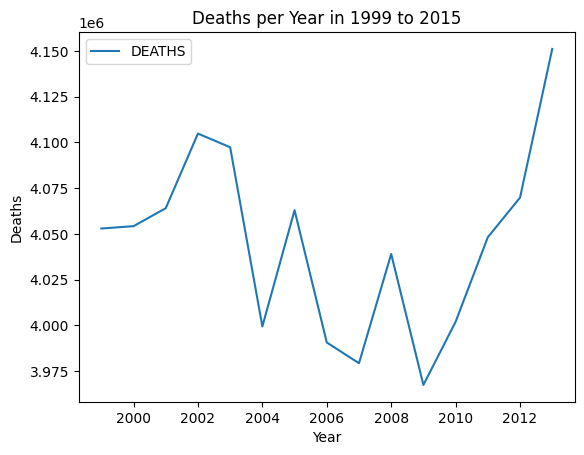

In [60]:
dyear["DEATHS"].plot(title="Deaths per Year in 1999 to 2015")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Deaths")

 *  The number of deaths declined between 2002 & 2009.Then there was a continuous growth in the number of deaths from 2010 & 2015 .Finally, there was a sharp increase in the number of deaths in 2013 & 2014.

**Data Visualization**

Plotting Data gives a clear idea about patterns behind the data and helps to make the right decisions in business

* Which ten states had the highest number of deaths overall ??

*Top Ten States with the highest Number od deaths in united states*

In [64]:
data1= data[data["STATE"]!="United States"]
dataset2 =data1.groupby("STATE").sum()
dataset2.sort_values("DEATHS",ascending=False,inplace=True)
dataset2.head(10)

,YEAR,DEATHS
STATE,,
California,481440,2998036
Florida,481440,2090865
Texas,481440,1970694
New York,481440,1923260
Pennsylvania,481440,1578921
Ohio,481440,1342279
Illinois,481440,1289453
Michigan,481440,1093334
North Carolina,481440,925272


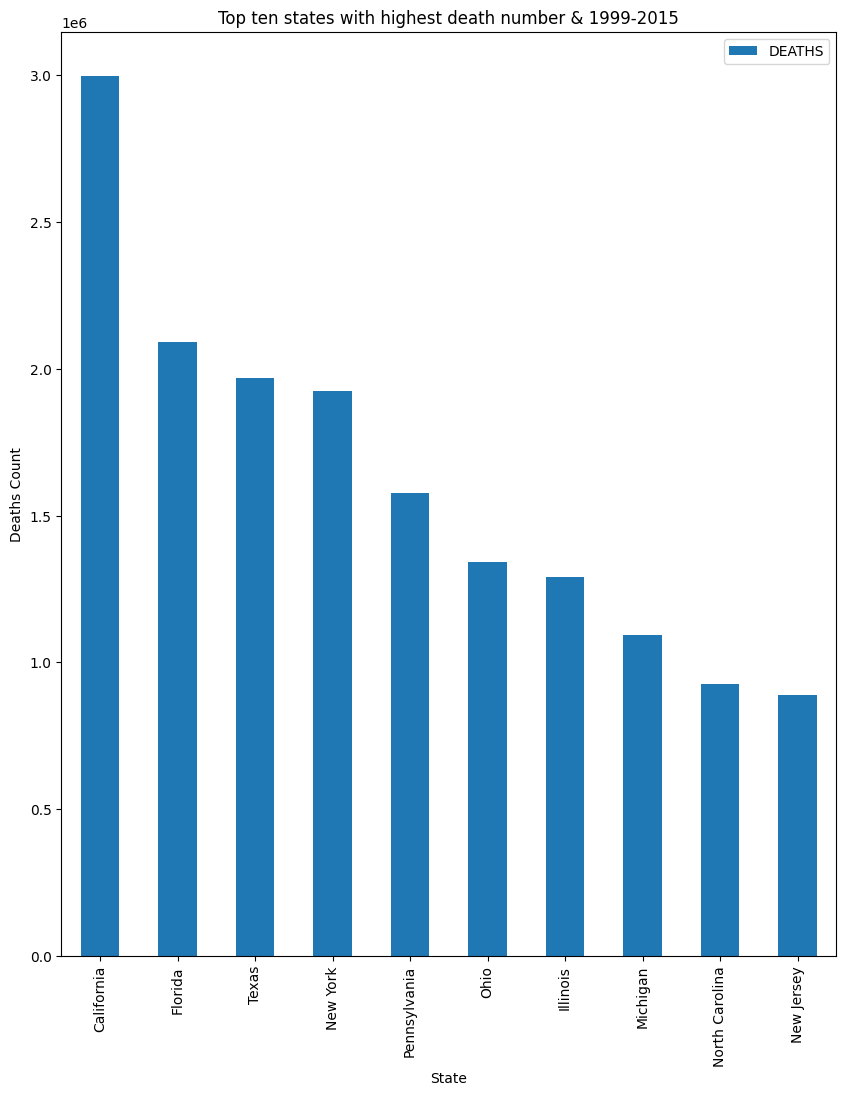

In [73]:
plt.figure(figsize=(10,12))
dataset2["DEATHS"].head(10).plot.bar(title="Top ten states with highest death number & 1999-2015")
plt.xlabel("State")
plt.ylabel("Deaths Count")
plt.legend()
plt.show()

 * Ans ---> California has the highest number of deaths in the United States with Florida coming in second

* What was the top causes of deaths in the United States during this period??

*Top 10 Causes of Death in United States*

In [75]:
dataset1= data[data["CAUSE_NAME"]!="All Causes"]
dataset2 = dataset1.groupby(["CAUSE_NAME"]).sum()
dataset2.sort_values("DEATHS",ascending=False,inplace=True)
dataset2.head(10)


,YEAR,DEATHS
CAUSE_NAME,,
Diseases of Heart,1564680,19383466
Cancer,1564680,16917736
Stroke,1564680,4329144
CLRD,1564680,3955976
Unintentional Injuries,1564680,3468022
Diabetes,1564680,2160596
Alzheimer's disease,1564680,2106414
Influenza and pneumonia,1564680,1750286
Kidney Disease,1564680,1319658


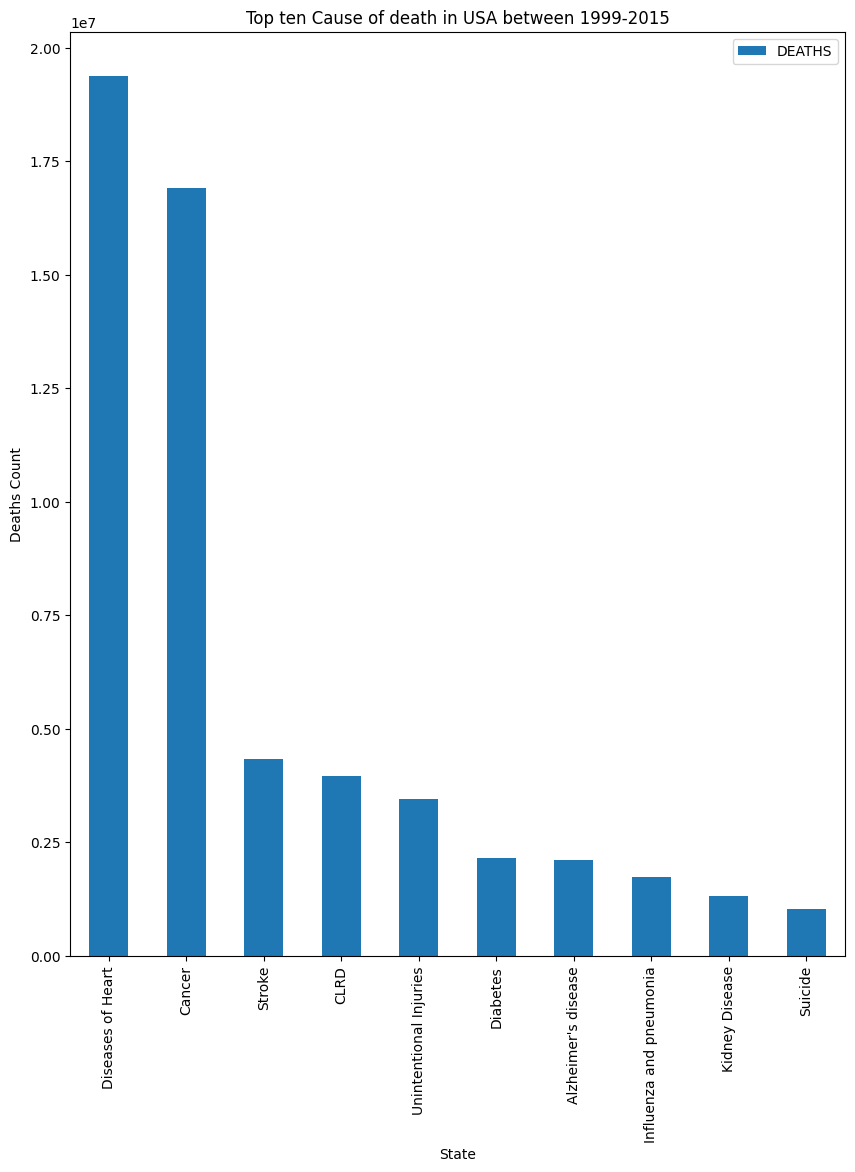

In [76]:
plt.figure(figsize=(10,12))
dataset2["DEATHS"].head(10).plot.bar(title="Top ten Cause of death in USA between 1999-2015")
plt.xlabel("State")
plt.ylabel("Deaths Count")
plt.legend()
plt.show()

* Ans---> Diseases of the heart represent the biggest cause of death followed by cancer

**Findings**

*Summarizes the study findings*

* ** Investigation Question**



1. What is the total number of records in the dataset?

2. What were the causes
of death in this data set?

3. What was the total number of deaths in the United States from 1999 to 2015?

4. What is the number of
deaths per year from 1999 to 2015?

5. Which ten states had the highest number of deaths overall?

6. What were the top causes of deaths in the United States during this period?

*  Findings

   * There were approximately 14,917 deaths recorded in the United States.

  * There are 16 causes of death according to the study data set.
  * The total number of deaths during thegiven period is 69,279,057

  * From 2002 to 2009 the number of deaths declined, then there an increase from 2010 to 2013. In 2013 and 2014, there was a sharp increase in the number of deaths.
  * California had the most deaths in theUnited States, with Florida in second place.
  *Diseases of the heart represent the highest causes of death followed by cancer



THANK YOU !!!😃